In [58]:
import sys
import pandas as pd
from scipy import stats
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from venn import venn 
from upsetplot import from_contents,UpSet
from matplotlib.backends.backend_pdf import PdfPages

sys.path.append('../../')

from scripts.util import *

In [110]:
counts = pd.read_csv('herv/deseq2_norm_erv.txt',sep='\t')

In [111]:
result_table = pd.read_csv('herv/result_table_erv.txt',sep='\t')

In [112]:
result_table.loc[
    :,result_table.columns.str.contains('comb_vs_dmso') | result_table.columns.str.contains('comb_vs_rg3039')
].head()

,comb_vs_dmso_log2FC,comb_vs_dmso_pvalue,comb_vs_rg3039_log2FC,comb_vs_rg3039_pvalue
37:ERV:MER4D1::chr1:92186-92477,-1.540589,0.670921,3.179776,0.411202
39:ERV:MLT1H::chr1:94750-95005,-1.224765,0.358523,-1.399520,0.291201
43:ERV:MamRep605::chr1:99985-100626,-1.372507,0.491368,-1.587485,0.424182
45:ERV:LTR33::chr1:103377-103889,-6.526863,0.173564,0.000000,1.000000
75:ERV:MLT1D::chr1:151916-152258,2.248601,0.436048,0.056646,0.983033


In [113]:
find_top

<function scripts.util.find_top(df, value, value_thr, stat, stat_thr, drop_dup=False, silent=False)>

In [114]:
data = {}

fc_thr  = 1
pval_thr = 0.01

for i in range(0,10,2):
    res = result_table.iloc[:,[i,i+1]]
    name = res.columns[0].replace('_log2FC','')
    print(name)
    up,dn = find_top(result_table,res.columns[0],fc_thr,res.columns[1],pval_thr)#.to_list()
    data[name+' | up'] = up.index.tolist()
    data[name+' | down'] = dn.index.tolist()
    data[name+' | no change'] = list(set(result_table.index) - set(up.index) - set(dn.index))

comb_vs_dmso
up:  465
down: 458
comb_vs_decitabine
up:  332
down: 246
comb_vs_rg3039
up:  233
down: 173
decitabine_vs_dmso
up:  247
down: 221
rg3039_vs_dmso
up:  296
down: 259


In [115]:
data["comb_vs_dmso | down"] == data['comb_vs_rg3039 | down']

False

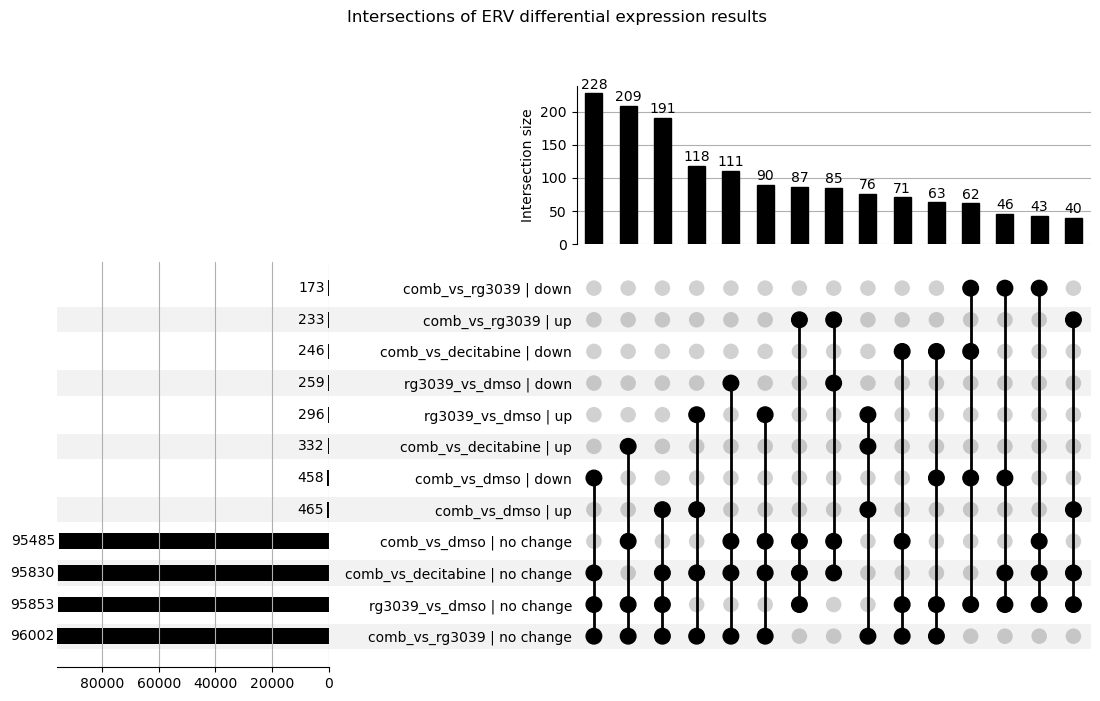

In [122]:
fig = plt.figure(figsize=(5, 5), dpi=100)

u = UpSet(
    from_contents(dict([(k,val) for k,val in data.items() if 'comb' in k or 'rg3039_vs_dmso' in k])),
    subset_size='count',
    # orientation='vertiCil',
    show_counts='%d',
    sort_by = 'cardinality',
    max_subset_size = 10000,
    min_subset_size = 40,
    intersection_plot_elements=5,
    totals_plot_elements=8,
    # present=['comb'],
).plot(fig = fig)

fig.suptitle('Intersections of ERV differential expression results')
fig.savefig('herv/upset.pdf')

In [49]:
data["comb_vs_dmso | down"] == data['comb_vs_rg3039 | down']

False

In [13]:
!date

Mon Sep  4 23:03:26 PDT 2023
